In [46]:
import pandas as pd
import numpy as np
import nltk
import csv

data = pd.read_csv('/Users/jegan/AnacondaProjects/Mumford/Mumford and Sons Lyrics.csv')
#data.head()

In [59]:
text = data['Text'].tolist()
#print(text)
word_list = [word for line in text for word in line.split()]

In [62]:
#stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

for words in word_list:
    stemmed = ps.stem(words)
    #print(stemmed)

In [93]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
#print(stop_words)

filtered_list = []
for words in word_list:
    if words not in stop_words:
        filtered_list.append(words)

#tokenize on spaces
total_text = ' '.join(filtered_list)
total_text.split(' ')
#print(total_text_ls)

from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer().build_tokenizer()(total_text)

from nltk.tokenize import word_tokenize
word_tokenize(total_text)
total_text.lower()
punctuation = ['(', ')', '?', ':', ';', ',', '.', '!', '/', '"', "'", '_']

for i in punctuation:
    total_text = total_text.replace(i, '')

#print(total_text)
import re
re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", total_text)
re.sub("([\(\[]).*?([\)\]])", "", total_text)
#total_text.replace('Ill', 'I will')
#total_text.replace('Youll', 'You will')
#total_text.replace('Im', 'I am')
    
#from nltk.tokenize.punkt import PunktWordTokenizer

#tokenizer = PunktWordTokenizer()
#tokenizer.tokenize(total_text)
#print(total_text)

#filtered_list = [filtered_list.lower() for words in filtered_list]



'Serve God love mend This end Live unbruised friends And Im sorry Im sorry Sigh more One foot sea one shore My heart never pure You know You know But man giddy thing Oh man giddy thing Oh man giddy thing Oh man giddy thing Love betray Dismay enslave you set free Be like man made There design alignment cry Of heart see The beauty love made Love betray Dismay enslave you set free Be like man made There design alignment cry Of heart see The beauty love made Love betray Dismay enslave you set free Be like man made And design alignment cry Of heart see The beauty love made Its empty valley heart The sun rises slowly walk Away fears And faults youve left behind The harvest left food eat You cannibal meat-eater see But I seen I know shame defeat But I hold hope And I wont let choke On noose around neck And Ill find strength pain And I change ways Ill know name its called Cause I things fill time You take Ill take mine Now let truth Which refresh broken mind So tie post block ears I see widows

In [147]:
raw = total_text.lower()
raw_list = raw.split()

from nltk.stem.wordnet import WordNetLemmatizer
lemm = WordNetLemmatizer()
raw_lemm = lemm.lemmatize(raw)
raw_list_lemm = raw_lemm.split()
#print(raw_list_lemm)
#print(raw_list, raw_list_lemm)

from collections import Counter
#tf = Counter(raw_list)
#tf = dict(tf)

tf_lemm = Counter(raw_list_lemm)
tf_lemm = dict(tf_lemm)
#print(tf_lemm)


#with open('/Users/jegan/AnacondaProjects/Mumford/Total Lyrics.csv', 'w') as f:  # Just use 'w' mode in 3.x
    #w = csv.DictWriter(f, tf.keys())
    #w.writeheader()
    #w.writerow(tf)

with open('/Users/jegan/AnacondaProjects/Mumford/TF_lemma.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, tf_lemm.keys())
    w.writeheader()
    w.writerow(tf_lemm)
    

In [165]:
import operator
sorted_x = sorted(tf_lemm.items(), key=operator.itemgetter(1))
tf_lemm = dict(sorted_x)


{'mend': 1, 'unbruised': 1, 'friends': 1, 'sigh': 1, 'sea': 1, 'shore': 1, 'pure': 1, 'valley': 1, 'rises': 1, 'slowly': 1, 'harvest': 1, 'food': 1, 'eat': 1, 'cannibal': 1, 'meat-eater': 1, 'defeat': 1, 'refresh': 1, 'post': 1, 'block': 1, 'widows': 1, 'orphans': 1, 'growing': 1, 'cave': 1, 'walking': 1, 'hanging': 1, 'upside': 1, 'understand': 1, 'dependence': 1, 'makers': 1, 'sirens': 1, 'freedom': 1, 'litter': 1, 'london': 1, 'hearts': 1, 'warmth': 1, 'swept': 1, 'trumped': 1, 'buried': 1, 'eaten': 1, 'plague': 1, 'memories': 1, 'pestilence': 1, 'overcome': 1, 'strife': 1, 'strikes': 1, 'spring': 1, 'swaps': 1, 'snow': 1, 'leaves': 1, 'happy': 1, 'wholesome': 1, 'clears': 1, 'ascends': 1, 'together': 1, 'afraid': 1, 'discover': 1, 'inside': 1, 'hole': 1, 'within': 1, 'filled': 1, 'void': 1, 'unreal': 1, 'character': 1, 'steals': 1, 'bridges': 1, 'welcome': 1, 'receive': 1, 'restart': 1, 'reason': 1, 'rhyme': 1, 'rightfully': 1, 'confess': 1, 'folly': 1, 'king': 1, 'blank': 1, 'page

In [191]:
#selected = {key: value for key, value in tf_lemm.items() if value > 10}
#dict(selected)

In [197]:
top_words = ['heart', 'know', 'hold', 'love', 'see', 'time', 'eyes', 'tell', 'mind', 'hands']
selected = {key: value for key, value in tf_lemm.items() if key in top_words}
print(selected)

{'hands': 18, 'tell': 18, 'mind': 31, 'see': 32, 'eyes': 39, 'time': 40, 'love': 56, 'know': 57, 'hold': 57, 'heart': 67}


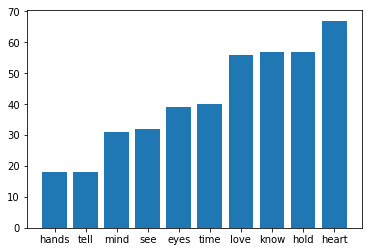

In [198]:
import matplotlib.pyplot as plt
n = len(top_words)

keys = list(selected.keys())
freq = list(selected.values())
plt.bar(range(len(selected)),freq,tick_label=keys)
plt.show()